In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
EV_data = pd.read_csv(r"C:\Data Analysis - Files\Final Project\ev_battery_charging_data.csv")
EV_data.head()

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Charging Mode,Efficiency (%),Battery Type,Charging Cycles,EV Model,Optimal Charging Duration Class
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,8.805096,Fast,98.238981,Li-ion,112,Model B,1
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,12.186860,Fast,97.562628,LiFePO4,398,Model A,1
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,13.832336,Slow,97.233533,LiFePO4,175,Model A,2
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,9.318874,Fast,98.136225,LiFePO4,150,Model B,1
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,11.687577,Fast,97.662485,Li-ion,886,Model C,2


In [75]:
# Add new column "Battery health"
EV_data['Battery Health (%)'] = 100 - EV_data['Degradation Rate (%)']

# Remove "Degradation rate" column
EV_data.drop(columns=['Degradation Rate (%)'], inplace=True)

EV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          1000 non-null   float64
 1   Voltage (V)                      1000 non-null   float64
 2   Current (A)                      1000 non-null   float64
 3   Battery Temp (°C)                1000 non-null   float64
 4   Ambient Temp (°C)                1000 non-null   float64
 5   Charging Duration (min)          1000 non-null   float64
 6   Charging Mode                    1000 non-null   object 
 7   Efficiency (%)                   1000 non-null   float64
 8   Battery Type                     1000 non-null   object 
 9   Charging Cycles                  1000 non-null   int64  
 10  EV Model                         1000 non-null   object 
 11  Optimal Charging Duration Class  1000 non-null   int64  
 12  Battery Health (%)   

In [76]:
# Check for missing values
print(EV_data.isnull().sum())

# Basic statistics
print(EV_data.describe())

# Data types
print(EV_data.dtypes)

# to remove duplicate
print (EV_data.shape)
EV_data = EV_data.dropna() # to remove duplicate
EV_data.head()

SOC (%)                            0
Voltage (V)                        0
Current (A)                        0
Battery Temp (°C)                  0
Ambient Temp (°C)                  0
Charging Duration (min)            0
Charging Mode                      0
Efficiency (%)                     0
Battery Type                       0
Charging Cycles                    0
EV Model                           0
Optimal Charging Duration Class    0
Battery Health (%)                 0
dtype: int64
           SOC (%)  Voltage (V)  Current (A)  Battery Temp (°C)  \
count  1000.000000  1000.000000  1000.000000        1000.000000   
mean     54.123090     3.854912    55.216515          29.807501   
std      26.292363     0.204533    26.160678           5.729787   
min      10.416882     3.502253    10.001047          20.013068   
25%      31.237594     3.668752    33.521588          24.838015   
50%      54.712664     3.863114    55.055253          29.685586   
75%      76.988763     4.032326    78

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Charging Mode,Efficiency (%),Battery Type,Charging Cycles,EV Model,Optimal Charging Duration Class,Battery Health (%)
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,Fast,98.238981,Li-ion,112,Model B,1,91.194904
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,Fast,97.562628,LiFePO4,398,Model A,1,87.813140
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,Slow,97.233533,LiFePO4,175,Model A,2,86.167664
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,Fast,98.136225,LiFePO4,150,Model B,1,90.681126
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,Fast,97.662485,Li-ion,886,Model C,2,88.312423


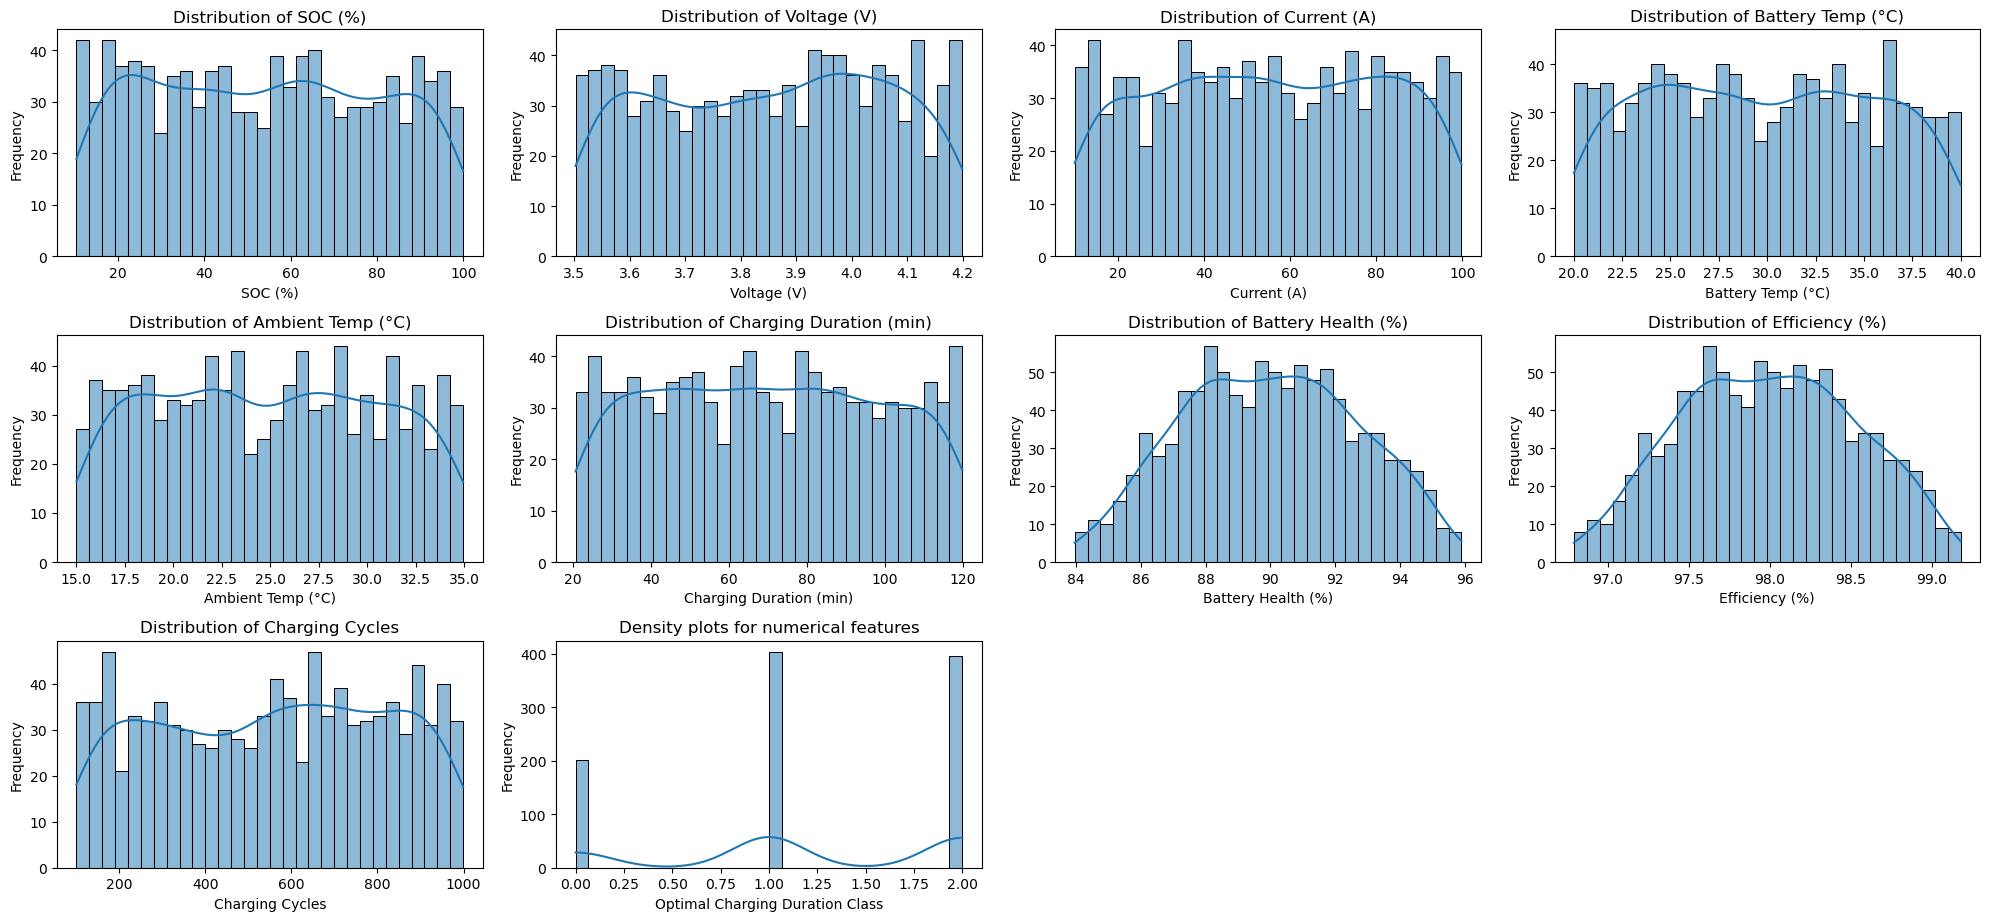

In [77]:
# Numerical Features
# Plot histograms or density plots for numerical features.

numerical_features = ['SOC (%)', 'Voltage (V)', 'Current (A)', 'Battery Temp (°C)', 'Ambient Temp (°C)', 
                      'Charging Duration (min)', 'Battery Health (%)', 'Efficiency (%)', 'Charging Cycles', 
                      'Optimal Charging Duration Class']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 4, i)
    sns.histplot(EV_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.title ('Density plots for numerical features')
plt.show()

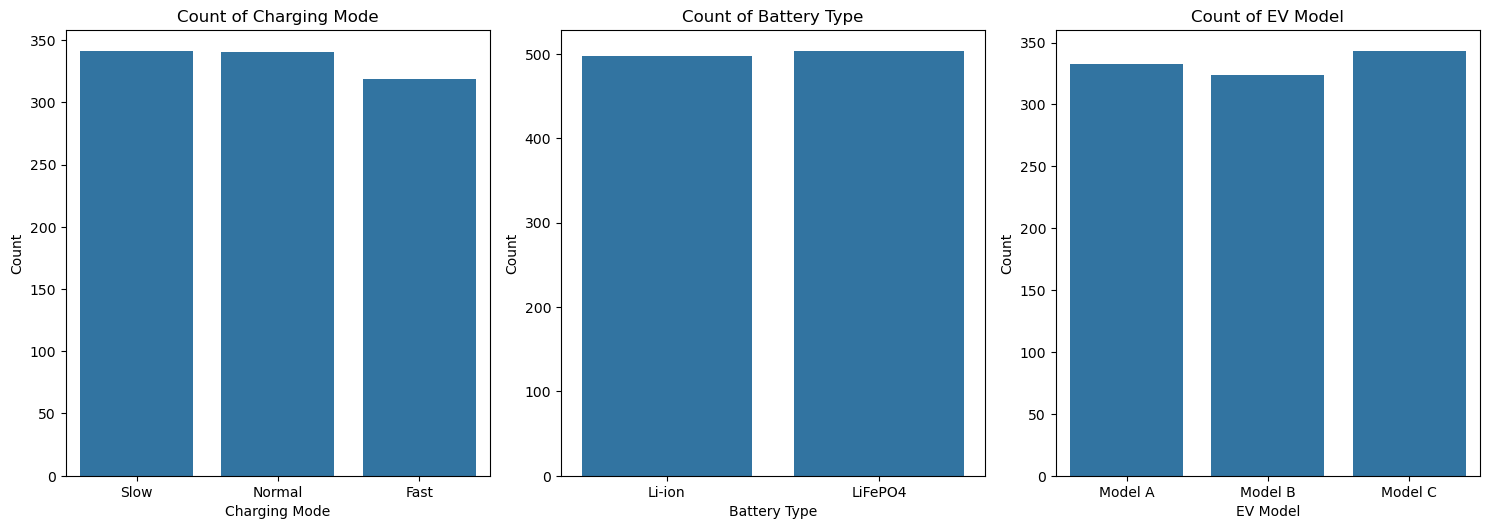

In [78]:
# Categorical Features
# Plot bar charts for categorical features.

categorical_features = ['Charging Mode', 'Battery Type', 'EV Model']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    
    # Define custom order based on feature
    if feature == 'Charging Mode':
        order = ['Slow', 'Normal', 'Fast']
    elif feature == 'EV Model':
        order = ['Model A', 'Model B', 'Model C']
    else:
        order = None  # Default order for other features
    
    sns.countplot(data=EV_data, x=feature, order=order)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

#plt.suptitle('Bar Charts for Categorical Features', fontsize=16)
plt.tight_layout()
plt.show()

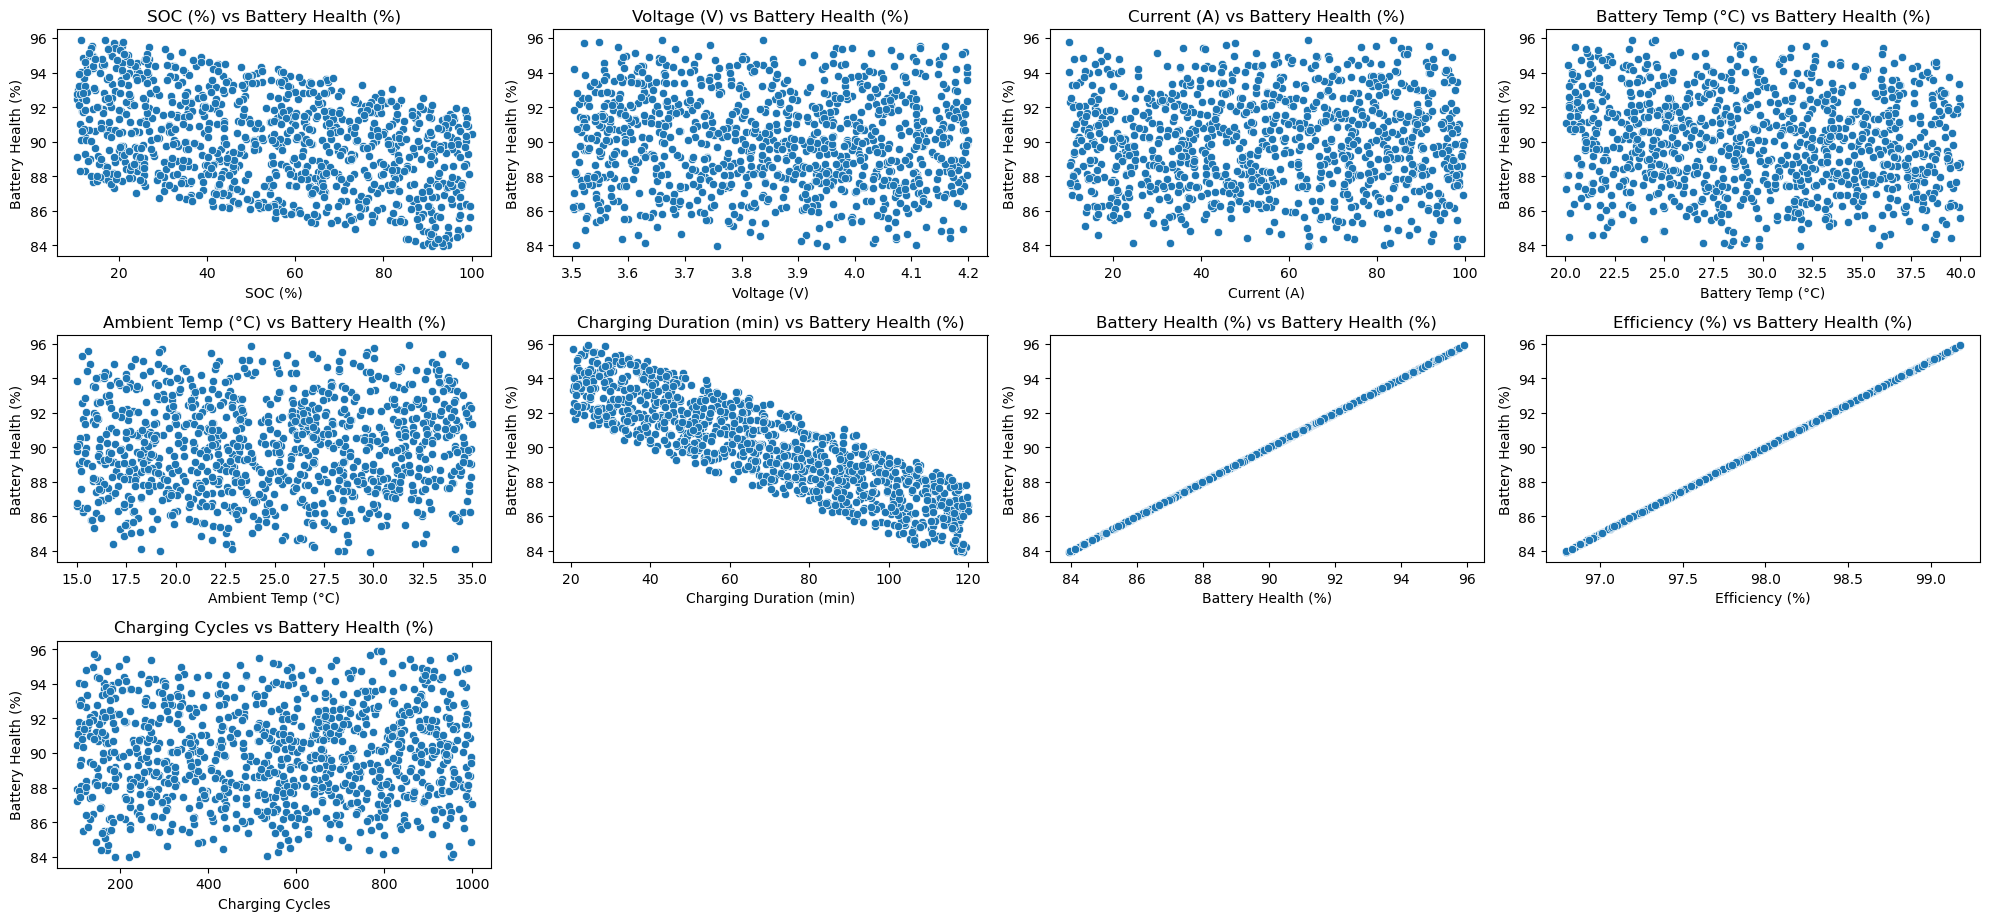

In [79]:
# Numerical Features vs Target
# Use scatter plots to visualize relationships.

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features[:-1], 1):  # Exclude 'Battery Health (%)'
    plt.subplot(5, 4, i)
    sns.scatterplot(data=EV_data, x=feature, y='Battery Health (%)')
    plt.title(f'{feature} vs Battery Health (%)')
    plt.xlabel(feature)
    plt.ylabel('Battery Health (%)')
plt.tight_layout()
plt.show()

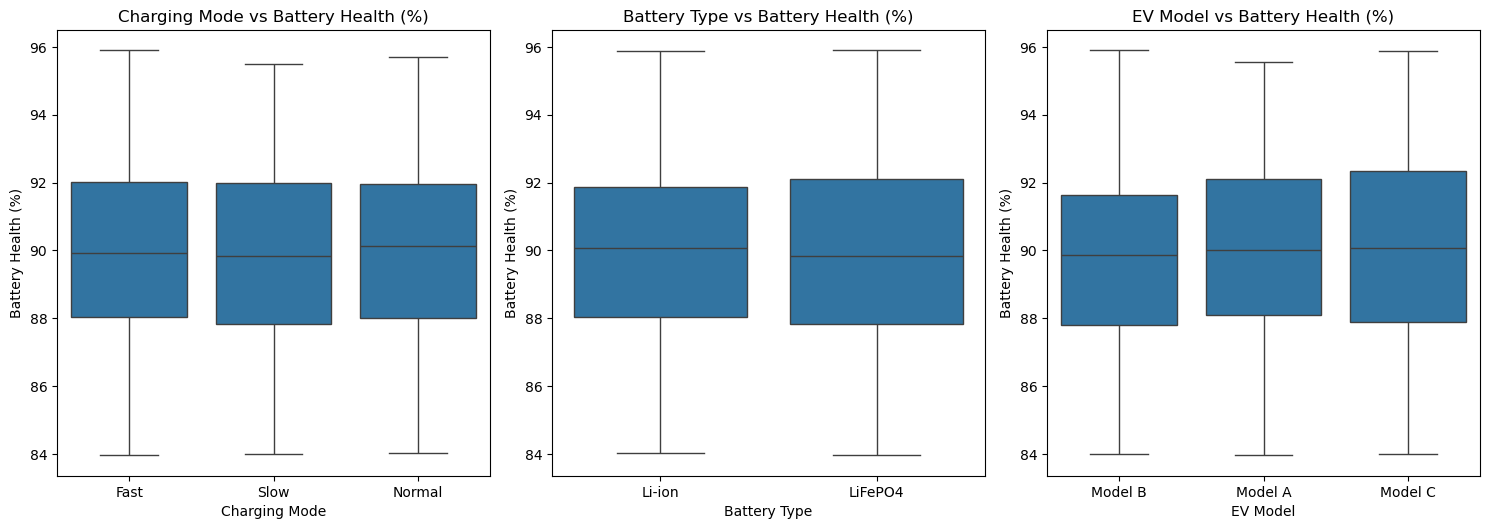

In [80]:
# Categorical Features vs Target
# Use box plots to compare the distribution of the target variable across categories.

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=EV_data, x=feature, y='Battery Health (%)')
    plt.title(f'{feature} vs Battery Health (%)')
    plt.xlabel(feature)
    plt.ylabel('Battery Health (%)')
plt.tight_layout()
plt.show()

C:\Users\Karan\AppData\Local\Temp\ipykernel_17232\1529755627.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=EV_data, x='Charging Duration (min)', y='Battery Health (%)', ci=None)


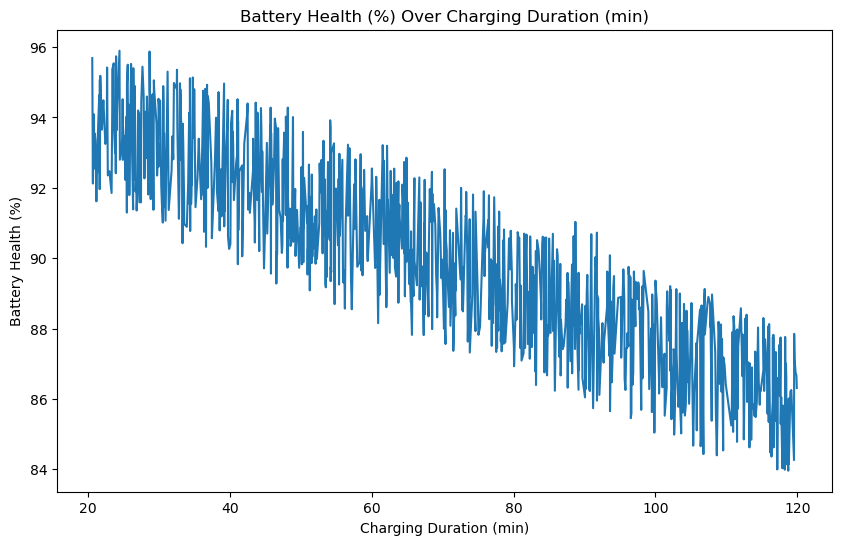

In [81]:
# Time-Based Analysis
# If the dataset includes a time component (e.g., Charging Duration (min)), analyze trends over time.

# Plot Battery Health (%) over Charging Duration (min)
plt.figure(figsize=(10, 6))
sns.lineplot(data=EV_data, x='Charging Duration (min)', y='Battery Health (%)', ci=None)
plt.title('Battery Health (%) Over Charging Duration (min)')
plt.xlabel('Charging Duration (min)')
plt.ylabel('Battery Health (%)')
plt.show()

C:\Users\Karan\AppData\Local\Temp\ipykernel_17232\2611950466.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=EV_data, x='Charging Cycles', y='Battery Health (%)', ci=None)


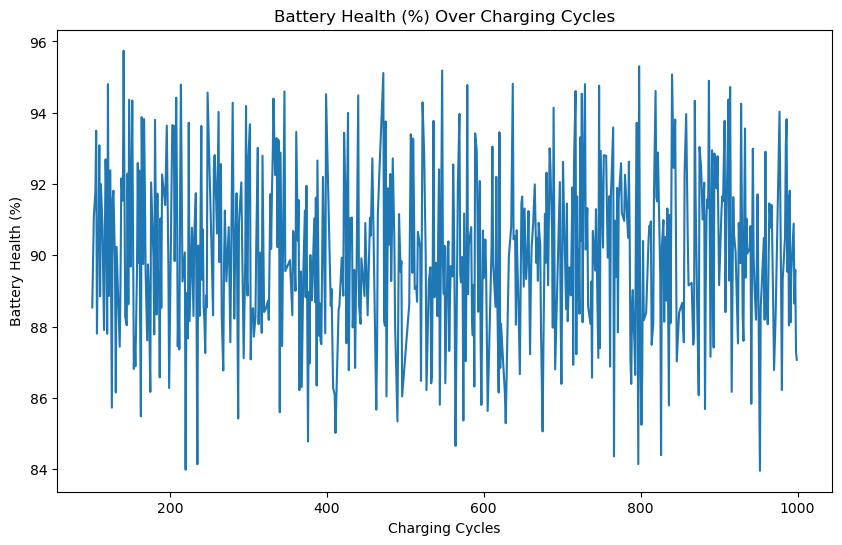

In [82]:
# Plot Battery Health (%) over Charging Duration (min)
plt.figure(figsize=(10, 6))
sns.lineplot(data=EV_data, x='Charging Cycles', y='Battery Health (%)', ci=None)
plt.title('Battery Health (%) Over Charging Cycles')
plt.xlabel('Charging Cycles')
plt.ylabel('Battery Health (%)')
plt.show()

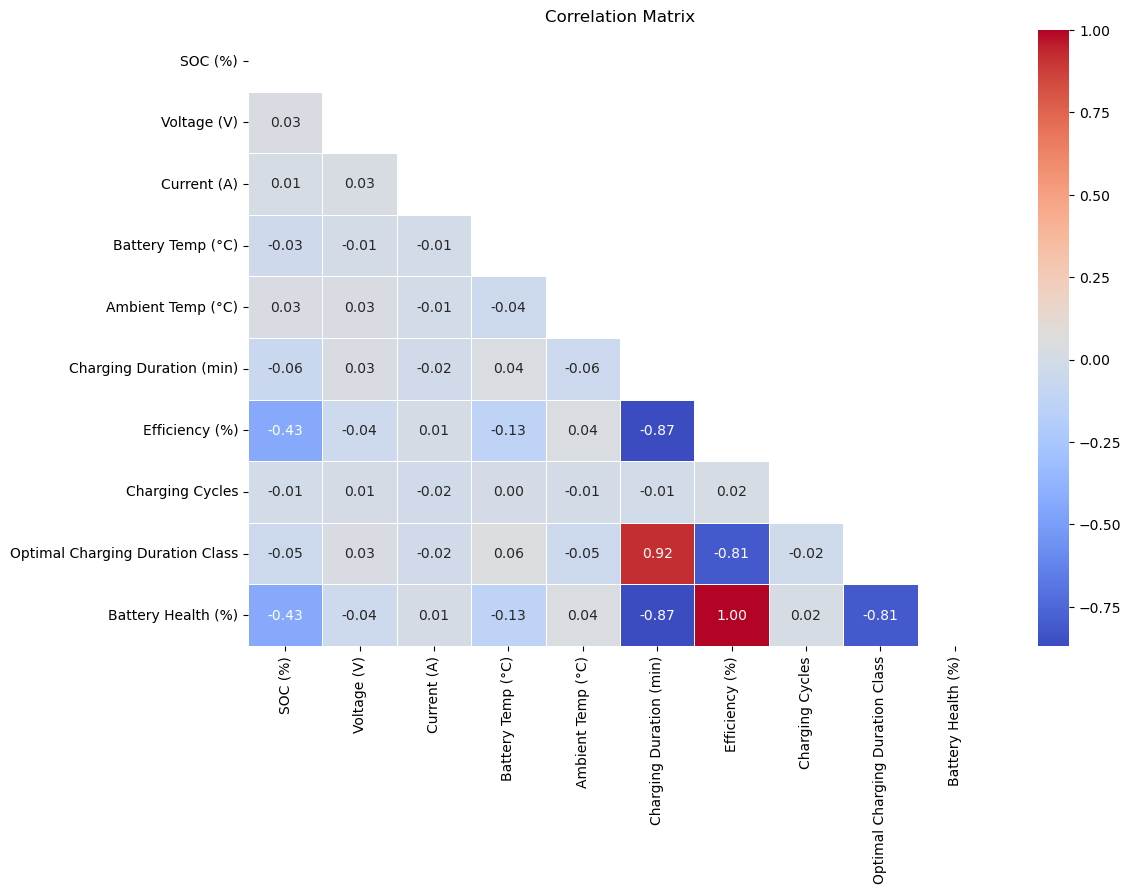

Battery Health (%)                 1.000000
Efficiency (%)                     1.000000
Ambient Temp (°C)                  0.037721
Charging Cycles                    0.016808
Current (A)                        0.012550
Voltage (V)                       -0.040471
Battery Temp (°C)                 -0.127583
SOC (%)                           -0.431175
Optimal Charging Duration Class   -0.807085
Charging Duration (min)           -0.868795
Name: Battery Health (%), dtype: float64


In [83]:
# Correlation matrix
corr_matrix = EV_data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12,8), dpi=100)
R_matrix = np.triu(corr_matrix)
sns.heatmap(corr_matrix, mask= R_matrix, cmap='coolwarm',fmt='.2f', annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Correlation with target variable
corr_with_target = corr_matrix['Battery Health (%)'].sort_values(ascending=False)
print(corr_with_target)



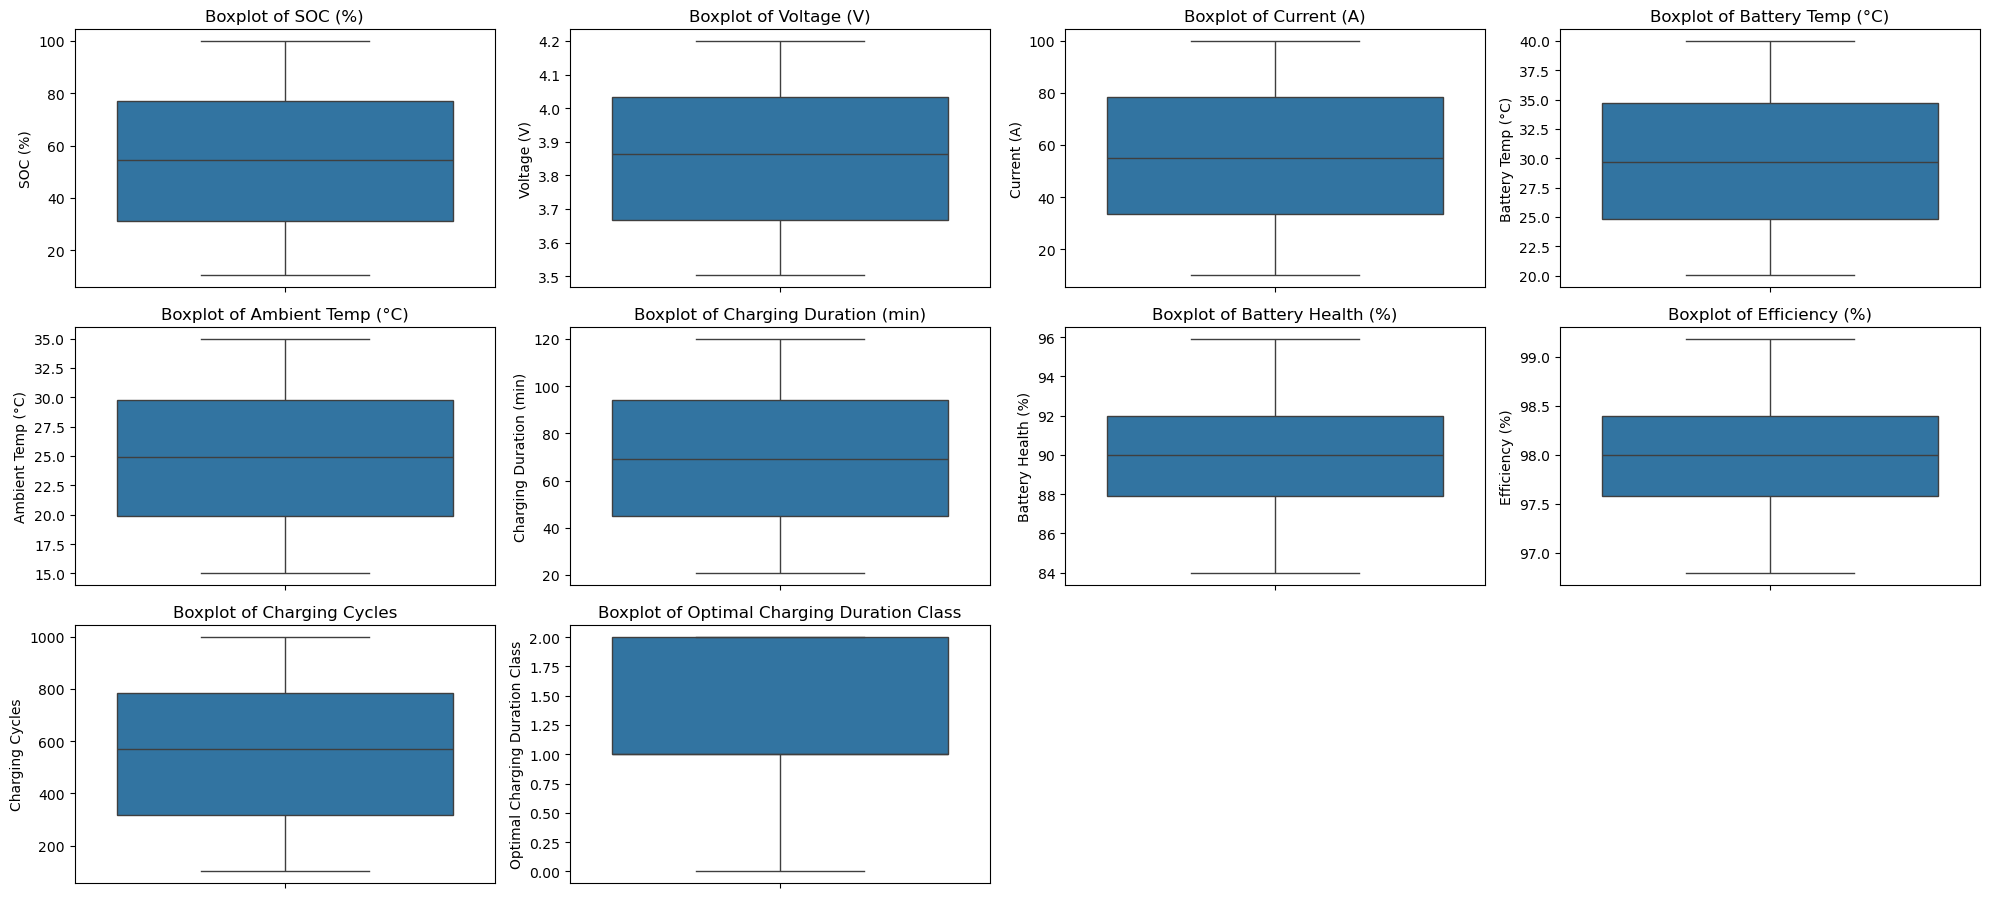

In [84]:
# Outlier Detection
# Identify outliers in the dataset using box plots or statistical methods.

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=EV_data, y=feature)
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

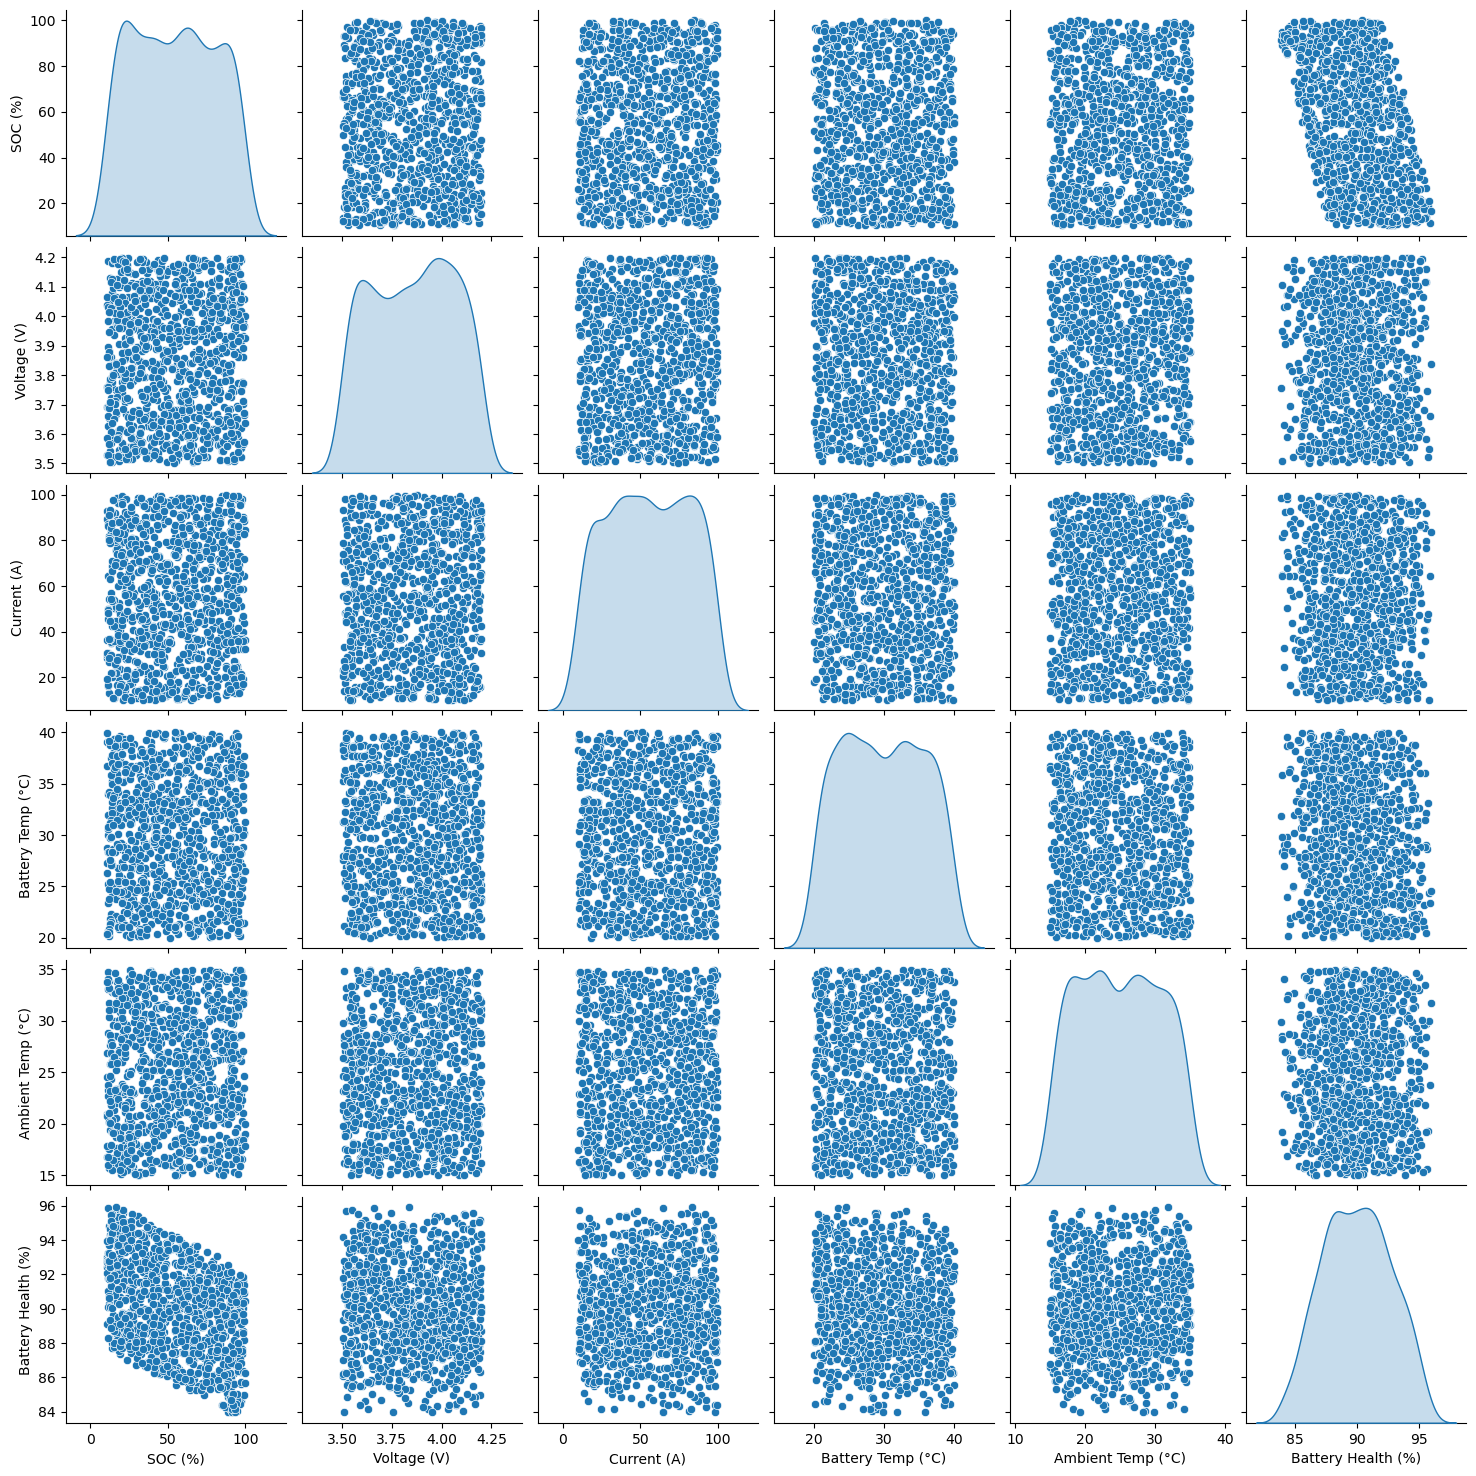

In [85]:
# Pairplot
# Visualize pairwise relationships between numerical features.
# Pairplot for selected numerical features

sns.pairplot(EV_data[numerical_features[:5] + ['Battery Health (%)']], diag_kind='kde')
plt.show()


In [47]:
# Example Insights from EDA

# SOC (%): Shows a normal distribution with most values centered around 50%.

# Voltage (V): Has a slight right skew, indicating some higher voltage values.

# Battery Health (%): The target variable is relatively balanced, with most values between 85% and 95%.

# Correlation: Degradation Rate (%) and Charging Stress are negatively correlated with Battery Health (%), 
# while Efficiency (%) is positively correlated.

# Outliers: Some features like Charging Speed and Temperature Stress have outliers that may need to be addressed.

In [48]:
# Key Insights from EDA

## Target Variable:

# Battery Health (%) is relatively balanced, with most values between 85% and 95%.

# It is strongly influenced by Efficiency (%) and Degradation Rate (%).

## Numerical Features:

# Degradation Rate (%) and Charging Stress are negatively correlated with battery health.

# Efficiency (%) and SOC (%) are positively correlated with battery health.

# Some features (e.g., Charging Speed, Temperature Stress) have outliers that need to be addressed.

## Categorical Features:

# Charging Mode_Normal and Battery Type_LiFePO4 may have a positive impact on battery health.

# Some categories are imbalanced, which may require balancing techniques.

## Time-Based Trends:

# Longer charging durations may negatively impact battery health.

# Multivariate Relationships:

# Interactions between SOC (%), Efficiency (%), and Degradation Rate (%) are critical for predicting battery health.

In [49]:
# here EV_Data includes cataegorial features
EV_data = EV_data.drop(columns=['Efficiency (%)', 'Current (A)', 'Voltage (V)', 'Ambient Temp (°C)', 'Charging Cycles'])

In [50]:
## One-Hot Encoding (OHE)

EV_data = pd.get_dummies(EV_data, columns=["Charging Mode",'Battery Type','EV Model'], drop_first=True)
EV_data.head()

,SOC (%),Battery Temp (°C),Charging Duration (min),Optimal Charging Duration Class,Battery Health (%),Charging Mode_Normal,Charging Mode_Slow,Battery Type_LiFePO4,EV Model_Model B,EV Model_Model C
0,43.708611,33.454060,59.363552,1,91.194904,False,False,False,True,False
1,95.564288,35.933628,67.343566,1,87.813140,False,False,True,False,False
2,75.879455,25.009358,105.454739,2,86.167664,False,True,True,False,False
3,63.879264,32.497482,54.000439,1,90.681126,False,False,True,True,False
4,24.041678,31.434920,106.964968,2,88.312423,False,False,False,False,True


In [51]:
# Convert all boolean columns to int (0/1) # as for removing outlier it need tobe in integer type

EV_data = EV_data.astype({col: int for col in EV_data.select_dtypes(include=['bool']).columns})

EV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          1000 non-null   float64
 1   Battery Temp (°C)                1000 non-null   float64
 2   Charging Duration (min)          1000 non-null   float64
 3   Optimal Charging Duration Class  1000 non-null   int64  
 4   Battery Health (%)               1000 non-null   float64
 5   Charging Mode_Normal             1000 non-null   int64  
 6   Charging Mode_Slow               1000 non-null   int64  
 7   Battery Type_LiFePO4             1000 non-null   int64  
 8   EV Model_Model B                 1000 non-null   int64  
 9   EV Model_Model C                 1000 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 78.2 KB


In [86]:
## EV_data with important 4 features
EV_data = EV_data[['SOC (%)','Charging Duration (min)', 'Battery Temp (°C)', 'Optimal Charging Duration Class', 'Battery Health (%)']]
EV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          1000 non-null   float64
 1   Charging Duration (min)          1000 non-null   float64
 2   Battery Temp (°C)                1000 non-null   float64
 3   Optimal Charging Duration Class  1000 non-null   int64  
 4   Battery Health (%)               1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [87]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import shap


In [88]:
## Machine Learning

# Train Regression Models to predict Remaining Life (%)
# Compare Model Performance using:
    # Linear Regression
    # Random Forest
    # XGBoost
# Evaluate Performance using R² Score and RMSE.

# Let’s split the data and train our first model! 


# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score, mean_squared_error
#from sklearn.metrics import accuracy_score

# Define features and target variable
X = EV_data.drop(columns=['Battery Health (%)'])
y = EV_data['Battery Health (%)']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

rmse, r2

c:\Users\Karan\anaconda3\envs\threeten\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(np.float64(0.2041190814678811), 0.9935774627704779)

In [90]:
# Hyperparameter Tuning (Grid Search)
# To improve accuracy, fine-tune the RandomForestRegressor with GridSearchCV:
# Creating a Parameter Grid for Hyperparameter Tuning in Random Forest. 
# In the first step of hyperparameter tuning there will be created a parameter grid to define the hyperparameters -
# - that are used to tune the Logistic Regression model performance.

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


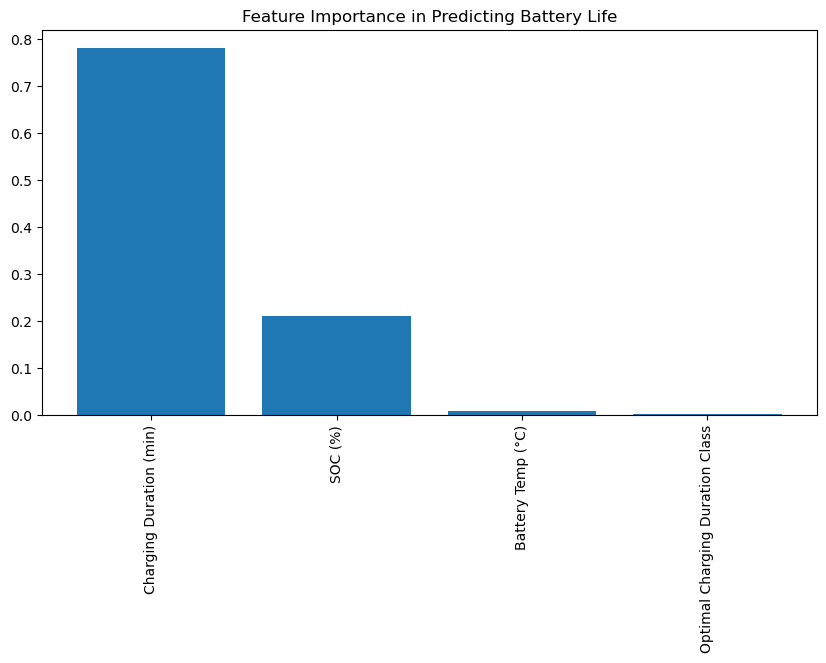

In [91]:
# Feature Importance Analysis
# Identify which features impact battery life predictions the most:

# Get feature importance
importances = best_model.feature_importances_
features = X.columns

# Sort and plot
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.title("Feature Importance in Predicting Battery Life")
plt.show()

In [92]:
# Model Performance Evaluation
# Compare Random Forest, XGBoost, and Linear Regression using RMSE & R²:

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    "Random Forest": best_model,
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
    "Linear Regression": LinearRegression()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")

## Liner Regression   
# Initialize the model
L_Model = LinearRegression()

# Train (fit) the model
L_Model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE and R²
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"LinearRegression: RMSE = {rmse:.2f}, R² = {r2:.2f}")


c:\Users\Karan\anaconda3\envs\threeten\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest: RMSE = 0.20, R² = 0.99
XGBoost: RMSE = 0.16, R² = 1.00
Linear Regression: RMSE = 0.00, R² = 1.00
LinearRegression: RMSE = 0.00, R² = 1.00


c:\Users\Karan\anaconda3\envs\threeten\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Karan\anaconda3\envs\threeten\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Karan\anaconda3\envs\threeten\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [99]:
X_test.iloc[32]


SOC (%)                             28.841439
Charging Duration (min)            111.112050
Battery Temp (°C)                   24.410085
Optimal Charging Duration Class      2.000000
Name: 621, dtype: float64

In [100]:
y_test.iloc[32]

np.float64(88.07808626994951)

 98%|===================| 196/200 [00:12<00:00]        

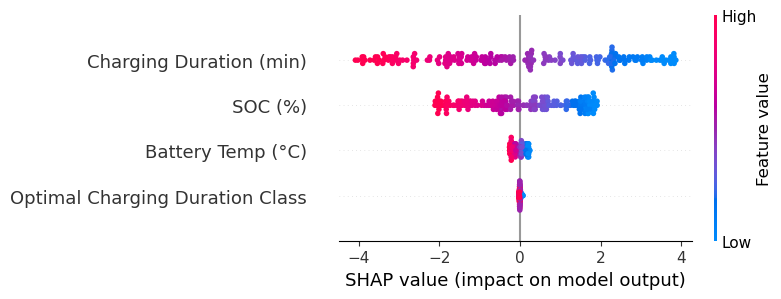

In [95]:
# Explainability with SHAP (Understanding Predictions)
# To interpret model decisions, use SHAP values:

import shap

# Initialize SHAP explainer
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test)

In [96]:
##Save the Model for Deployment

# Which one should you use?

# Pickle (.pkl) is great for simple models.
# Joblib (.joblib) is faster for large models, as it handles NumPy arrays more efficiently.

#using Joblib here

import joblib

# Save model using joblib
joblib.dump(L_Model, "battery_health_L_model.joblib")  # as it is saved once line is hidded

print("Model saved successfully!")


Model saved successfully!


In [97]:
## Load the Model for Future Use

loaded_model = joblib.load("battery_health_L_model.joblib")

# Check if the model loads correctly
print(loaded_model)

LinearRegression()


In [98]:
##Test the Loaded Model ## for above iloc = 5 ##
# SOC (%)                            97.252339
# Charging Duration (min)            91.222021
# Battery Temp (°C)                  36.028916
# Optimal Charging Duration Class     2.000000

## Answer bateery health should be --> (85.7341022308949)


new_sample = np.array([[91.222021, 97.252339, 36.028916, 2 ]])  # input
predicted_health = loaded_model.predict(new_sample)

print("Predicted Battery Health:", predicted_health)

Predicted Battery Health: [85.53309157]


c:\Users\Karan\anaconda3\envs\threeten\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
